In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from matplotlib import pyplot

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [4]:
# sampling
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Exploratory Data Analysis

Проверка на пустые значения

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Подозрительно, проверим данные на адекватность

In [9]:
for x in df.columns:
    print(x,len(df[df[x]==0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


// Заменим нули на NA в тех колонках, где 0 скорее всего означает пропуск данных
Лучше запомним, что это нули, чтоб потом завелась линейная регрессия для предсказания значений пропусков

In [8]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

Сводные статистики

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
color = sns.color_palette()

%matplotlib inline

In [13]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

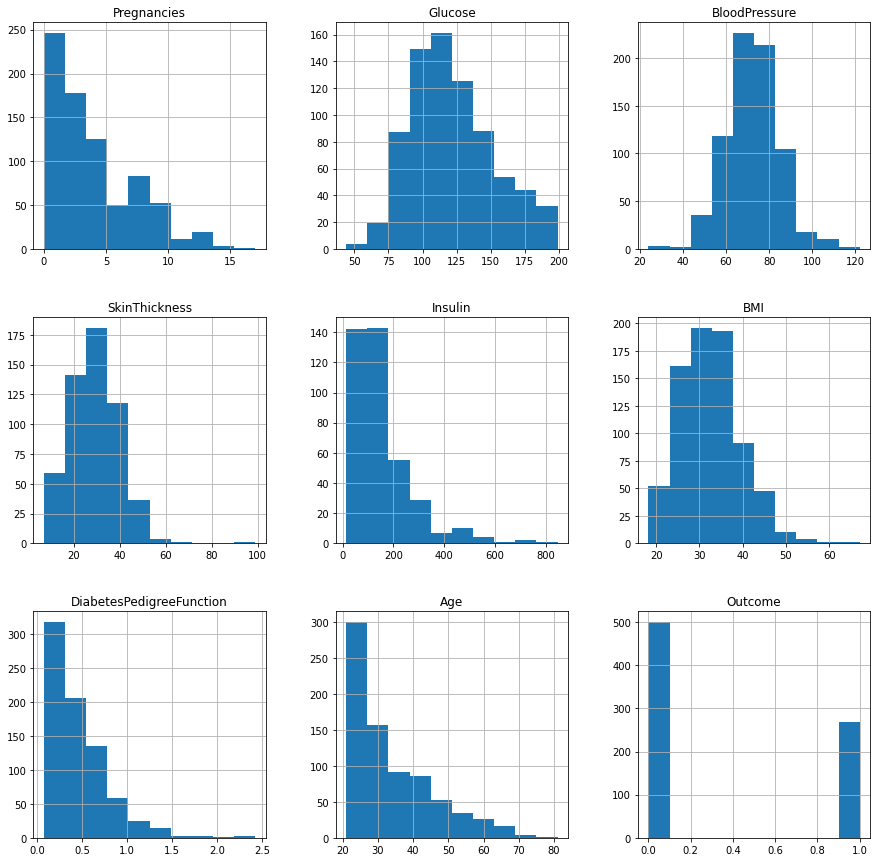

In [14]:
df.hist(figsize = (15,15))

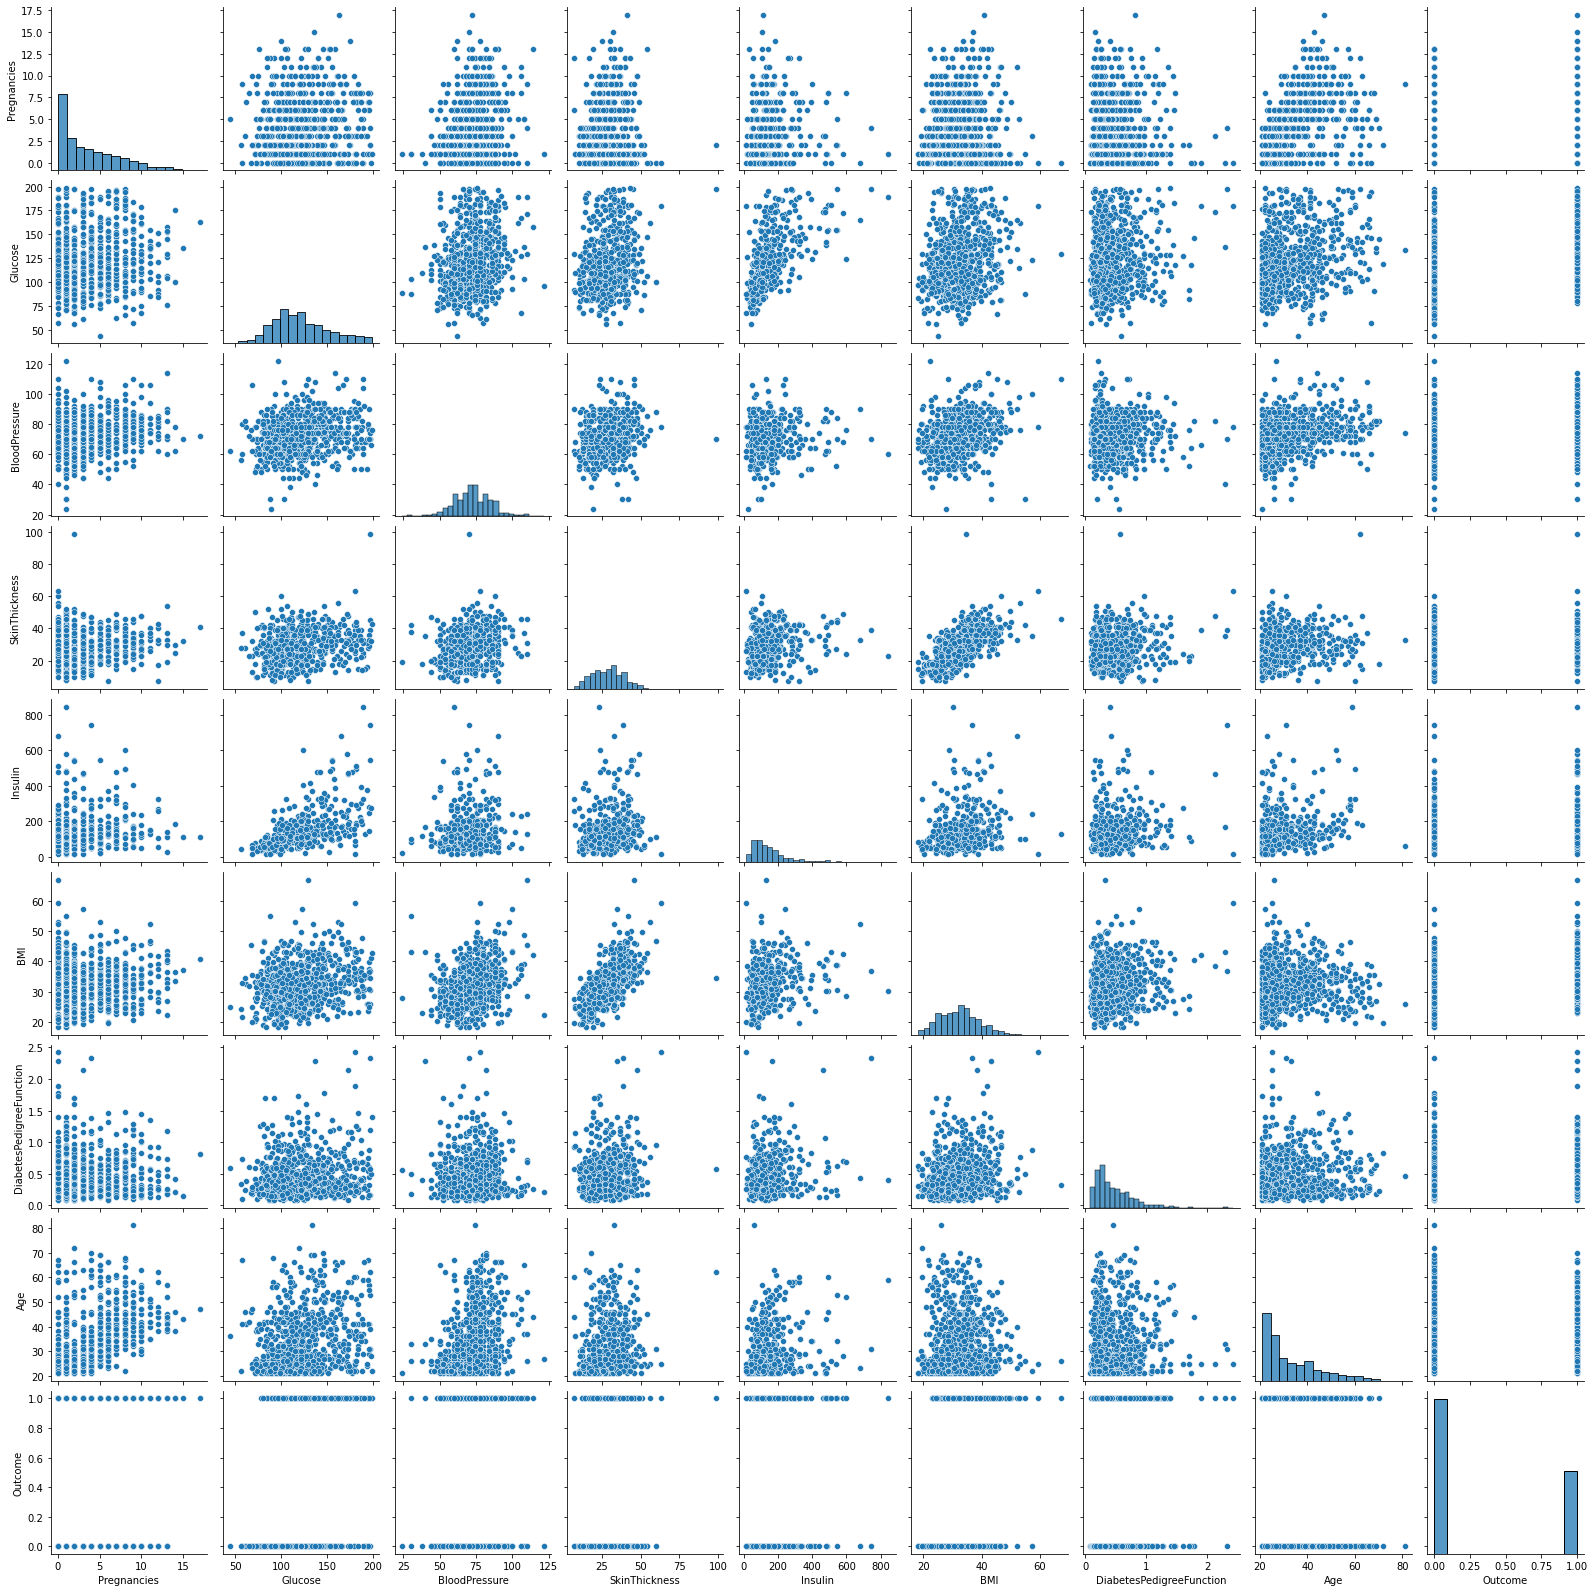

In [15]:
sns.pairplot(df)

<AxesSubplot:>

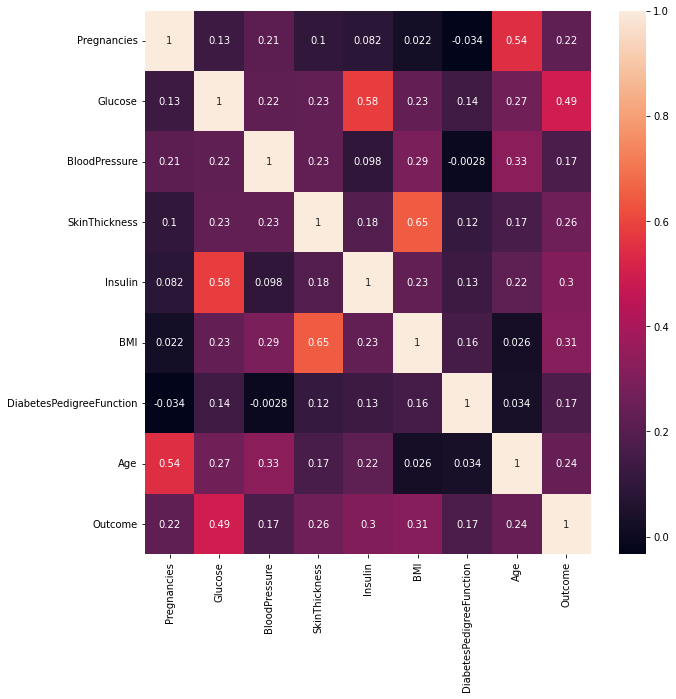

In [16]:
#Visual the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

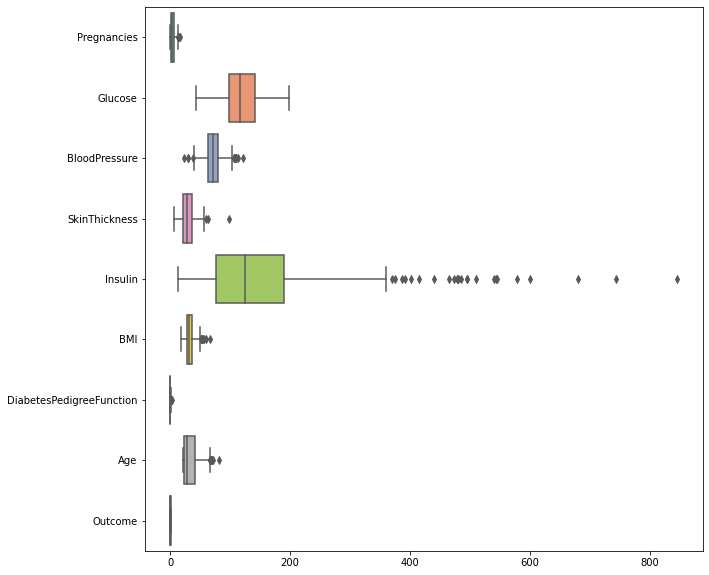

In [17]:
#Check for outliers
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, orient="h", palette="Set2",)

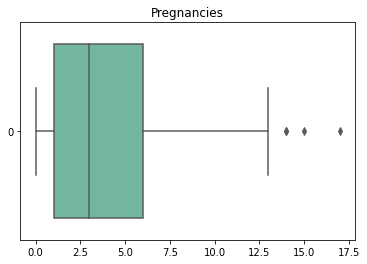

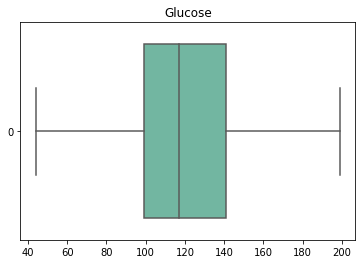

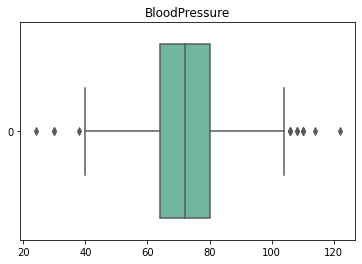

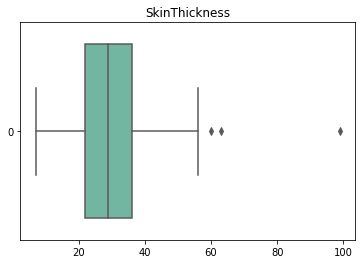

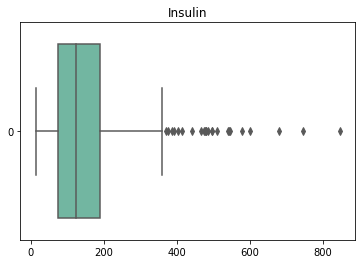

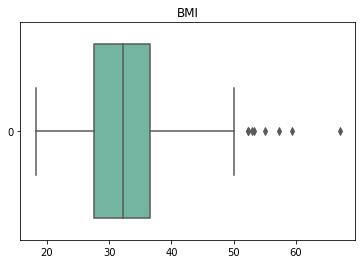

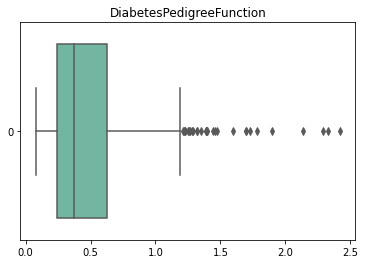

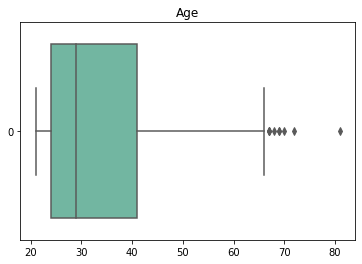

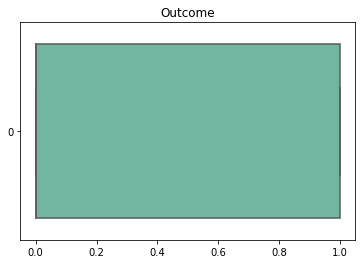

In [18]:
for col in df.columns:
    plt.title(col)
    ax = sns.boxplot(data=df[col], orient="h", palette="Set2",)
    plt.show()

График, где по оси Х - бины по BMI или по возрасту, а по оси Y boxplot по глюкозе или инсулину.

In [11]:
x_cols = ['BMI', 'Age']
y_cols = ['Glucose', 'Insulin']

In [25]:
df_binned = df[x_cols + y_cols]
df_binned

,BMI,Age,Glucose,Insulin
0,33.6,50,148.0,NaN
1,26.6,31,85.0,NaN
2,23.3,32,183.0,NaN
3,28.1,21,89.0,94.0
4,43.1,33,137.0,168.0
...,...,...,...,...
763,32.9,63,101.0,180.0
764,36.8,27,122.0,NaN
765,26.2,30,121.0,112.0
766,30.1,47,126.0,NaN


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'Insulin'}>]], dtype=object)

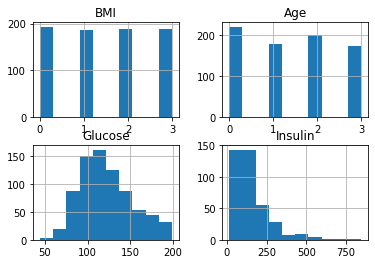

In [31]:
df_binned.hist()

In [28]:
for col in x_cols:
    df_binned[col] = pd.qcut(df_binned[col], 4, labels=False)

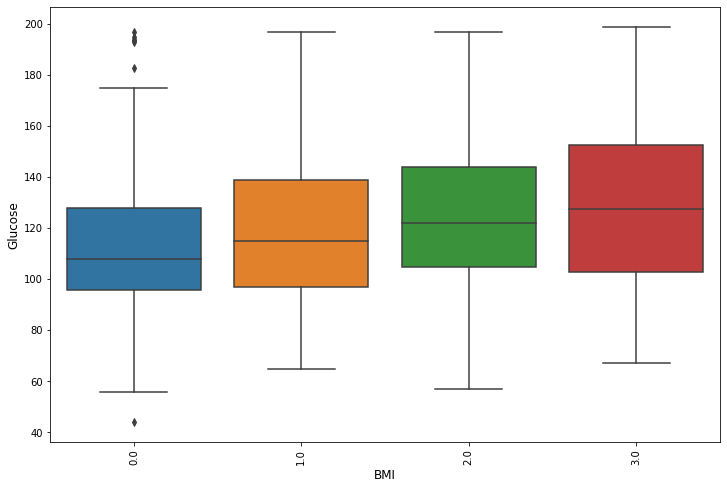

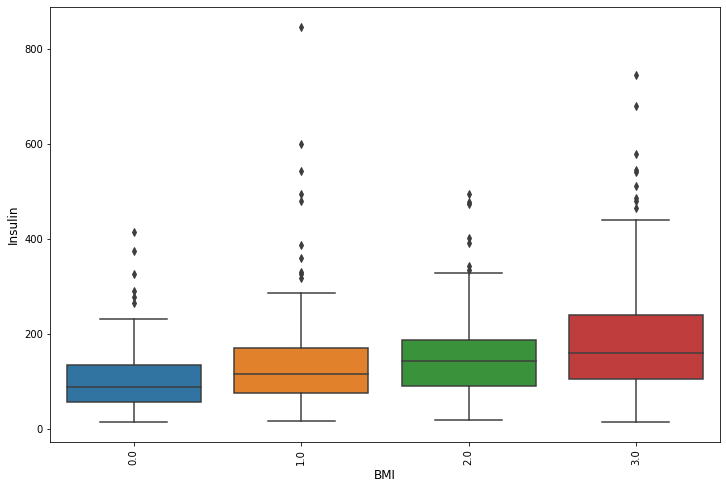

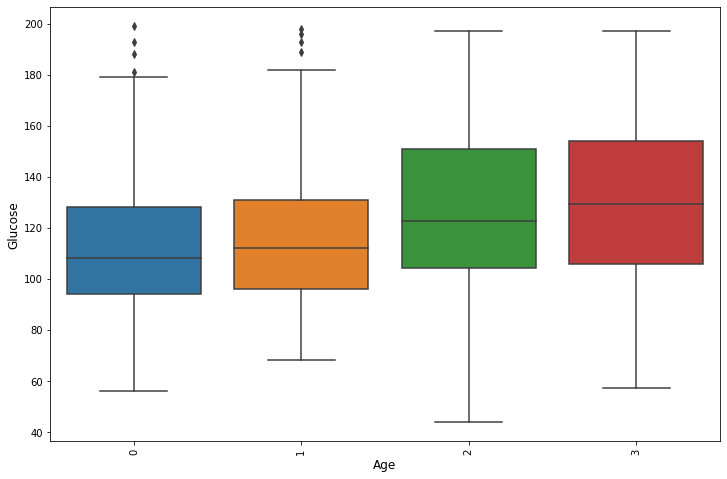

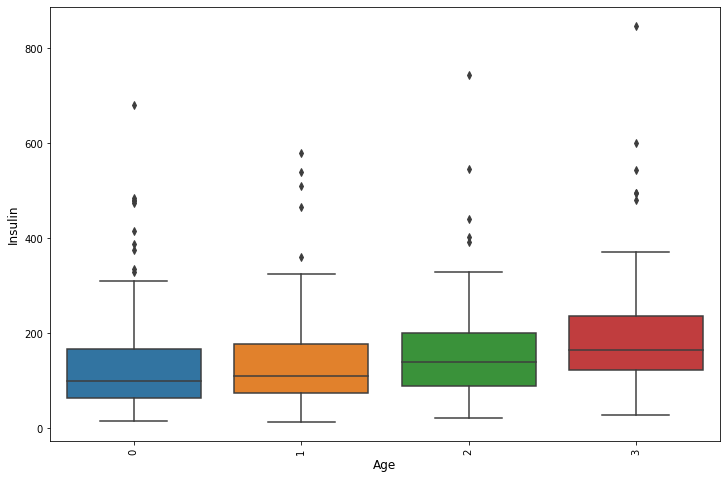

In [30]:
for col in x_cols:
    for col_y in y_cols:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=col, y=col_y, data=df_binned)
        plt.ylabel(col_y, fontsize=12)
        plt.xlabel(col, fontsize=12)
        plt.xticks(rotation='vertical')
        plt.show()

Подготовка данных

Пропуски заполним с помощью линейной регрессии, данные нормализуем

In [19]:
features_to_fill = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [20]:
def preprocessing(df):
    features_to_fill = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    df[features_to_fill] = df[features_to_fill].replace(0,np.nan)
    # for feature in features_to_fill:
    #     X = df.drop(feature, axis = 1)
    #     # X = X.dropna()
    #     y = df[feature]
    #     reg = LinearRegression().fit(X, y)
    #     df[f'{feature}_pred'] = reg.predict(df.drop(feature, axis = 1))

    # df[feature] = np.where(df[feature] > 0, df[feature], df[f'{feature}_pred'])
    # заполнение нанов
    imputer = KNNImputer(n_neighbors=2)
    df[features_to_fill] = imputer.fit_transform(df[features_to_fill])
    # новые фичи
    df['N0'] = df['BMI'] * df['SkinThickness']
    df['N8'] = df['Pregnancies'] / df['Age']
    df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']
    df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']
    df['N14'] = df['Age'] / df['Insulin']
    features_to_scale = df.columns.tolist()
    features_to_scale.remove('Outcome')
    std = StandardScaler()
    df[features_to_scale] = std.fit_transform(df[features_to_scale])
    return df



Feature Engineering

In [21]:
df['N0'] = df['BMI'] * df['SkinThickness']
df['N8'] = df['Pregnancies'] / df['Age']
df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']
df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']
df['N14'] = df['Age'] / df['Insulin']

Нормализация данных

In [22]:
features_to_scale = df.columns.tolist()
features_to_scale.remove('Outcome')
std = StandardScaler()
df[features_to_scale] = std.fit_transform(df[features_to_scale])

In [23]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [24]:
def get_X_y():
    df = pd.read_csv('diabetes.csv')
    df = preprocessing(df)
    X = df.drop('Outcome', 1)
    y = df['Outcome']
    return X, y


In [25]:
df = pd.read_csv('diabetes.csv')
df = preprocessing(df)

In [26]:
X = df.drop('Outcome', 1)
y = df['Outcome']

In [27]:
def model_performance(model, subtitle) :
    #Kfold
    cv = KFold(n_splits=5,shuffle=True, random_state = 42)
    y_real = []
    y_proba = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1


    for train,test in cv.split(X,y):
        model.fit(X.iloc[train], y.iloc[train])
        pred_proba = model.predict_proba(X.iloc[test])
        precision, recall, _ = precision_recall_curve(y.iloc[test], pred_proba[:,1])
        y_real.append(y.iloc[test])
        y_proba.append(pred_proba[:,1])
        fpr, tpr, t = roc_curve(y[test], pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Confusion matrix
    y_pred = cross_val_predict(model, X, y, cv=5)
    conf_matrix = confusion_matrix(y, y_pred)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T
    show_metrics
    print(show_metrics)

In [28]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [29]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

In [30]:
import lightgbm as lgbm

In [31]:
random_state=42

fit_params = {"early_stopping_rounds" : 100,
              "eval_metric" : 'auc',
              "eval_set" : [(X,y)],
              'eval_names': ['valid'],
              'verbose': 0,
              'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50),
              'min_child_samples': sp_randint(100, 500),
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8),
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test,
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [32]:
model_performance(lgbm_clf, 'LightGBM')

          0
0  0.760417
1  0.669355
2  0.619403
3  0.643411


In [33]:
lgbm_clf

LGBMClassifier(colsample_bytree=0.9188117152201242, learning_rate=0.05,
               max_depth=7, min_child_samples=137, min_child_weight=0.1,
               n_estimators=200, num_leaves=19, reg_alpha=2, reg_lambda=0,
               subsample=0.38188584007687904)

In [34]:
# Standard python libraries
import os
import time

from sklearn.metrics import mean_squared_log_error
import torch

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [35]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 600
TARGET_NAME = 'Outcome'
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)
tr_data, te_data = train_test_split(
    df,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

Data splitted. Parts sizes: tr_data = (614, 14), te_data = (154, 14)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N0,N8,N13,N12,N14
60,-0.547919,-1.237784,-0.275363,-0.233817,-0.519237,0.661401,-0.507006,-1.041549,0,0.007179,-0.158702,-0.406567,-0.730138,-0.410607
618,1.530847,-0.318202,0.785091,-0.490788,-0.110816,-0.618613,2.446670,1.425995,1,-0.617310,0.878312,-1.135373,3.737613,0.165491
346,-0.844885,0.568538,-2.151553,-1.004731,-0.640790,-0.546296,0.550035,-0.956462,0,-0.886535,-0.767775,-0.652562,-0.110555,-0.229591
294,-1.141852,1.291067,-1.825259,-0.285211,1.284619,-1.529810,-0.658012,2.702312,0,-0.837194,-1.323886,0.972507,0.053707,-0.364831
231,0.639947,0.404327,0.621944,0.845462,2.150081,1.984805,-0.706334,1.085644,1,1.496771,0.271910,0.699297,-0.376843,-0.793645


In [36]:
automl = TabularAutoML(task = Task('binary', metric = lambda y_true, y_pred: f1_score(y_true, (y_pred > 0.5)*1)))

In [37]:
oof_pred = automl.fit_predict(tr_data, roles = {'target': 'Outcome'})

In [38]:
test_pred = automl.predict(te_data)

In [39]:
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, (y_pred > 0.5).astype(int))

In [40]:
y_pred = np.where(test_pred.data[:, 0] > 0.5, 1, 0)

In [41]:

conf_matrix = confusion_matrix(te_data['Outcome'].values, y_pred)

#Show metrics
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
fp = conf_matrix[0,1]
tn = conf_matrix[0,0]
Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
Precision =  (tp/(tp+fp))
Recall    =  (tp/(tp+fn))
F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
show_metrics = show_metrics.T
show_metrics
print(show_metrics)

          0
0  0.772727
1  0.685185
2  0.672727
3  0.678899


In [42]:
def print_confusion_matrics(y_validation, y_pred):
    conf_matrix = confusion_matrix(y_validation, y_pred)
    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score], ['Accuracy', 'Precision', 'Recall', 'F-score']])
    show_metrics = show_metrics.T
    show_metrics
    print(show_metrics)

In [43]:
print('OOF acc: {}'.format(acc_score(tr_data['Outcome'].values,      oof_pred.data[:, 0])))
print('VAL acc: {}'.format(acc_score(te_data['Outcome'].values, test_pred.data[:, 0])))

OOF acc: 0.7768729641693811
VAL acc: 0.7727272727272727


Wall time: 65.6 ms


<AxesSubplot:xlabel='Feature'>

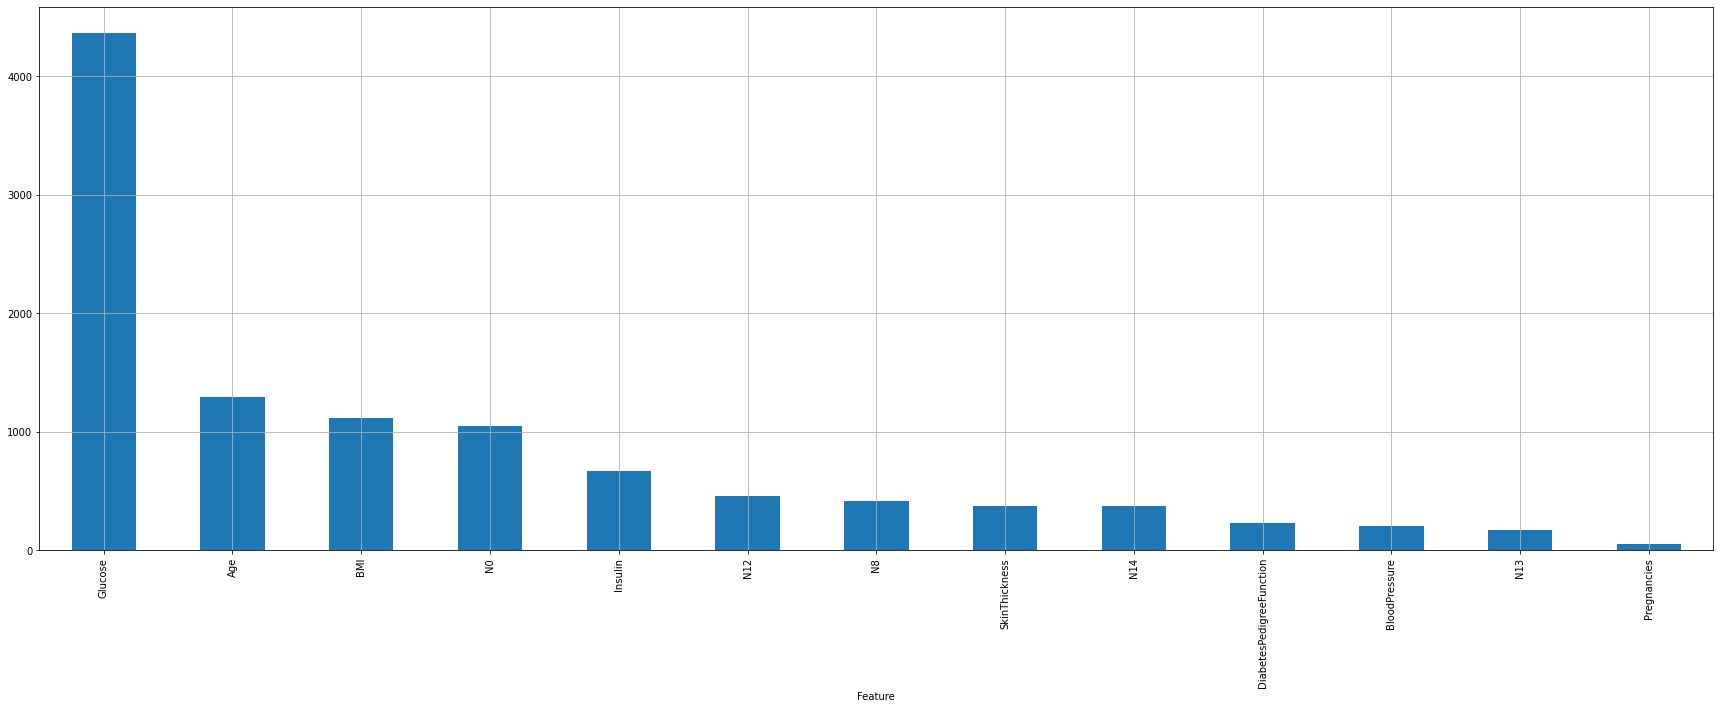

In [44]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [45]:
accurate_fi = automl.get_feature_scores('accurate', te_data, silent = False)

In [46]:
import matplotlib

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

<AxesSubplot:xlabel='Feature'>

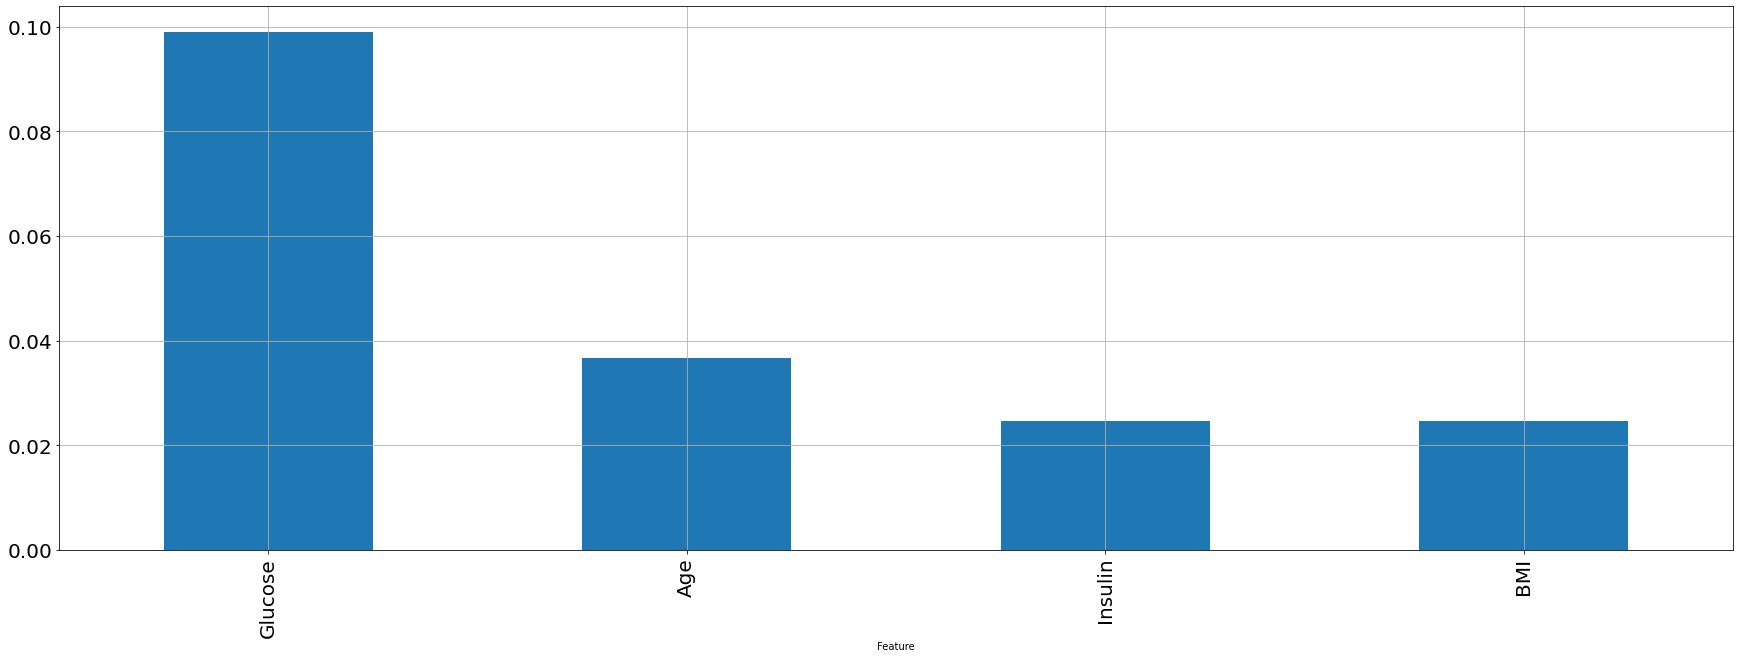

In [47]:
accurate_fi.set_index('Feature')['Importance'][0:4].plot.bar(figsize = (30, 10), grid = True)

In [48]:

# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [49]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['bbc'] = BalancedBaggingClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    # models['lama'] = automl
    models['lgb'] = lgbm_clf
    return models

In [50]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('bbc', BalancedBaggingClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # level0.append(('lama', automl))
    level0.append(('lgbm', lgbm_clf))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [51]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [52]:
tr_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N0,N8,N13,N12,N14
60,-0.547919,-1.237784,-0.275363,-0.233817,-0.519237,0.661401,-0.507006,-1.041549,0,0.007179,-0.158702,-0.406567,-0.730138,-0.410607
618,1.530847,-0.318202,0.785091,-0.490788,-0.110816,-0.618613,2.446670,1.425995,1,-0.617310,0.878312,-1.135373,3.737613,0.165491
346,-0.844885,0.568538,-2.151553,-1.004731,-0.640790,-0.546296,0.550035,-0.956462,0,-0.886535,-0.767775,-0.652562,-0.110555,-0.229591
294,-1.141852,1.291067,-1.825259,-0.285211,1.284619,-1.529810,-0.658012,2.702312,0,-0.837194,-1.323886,0.972507,0.053707,-0.364831
231,0.639947,0.404327,0.621944,0.845462,2.150081,1.984805,-0.706334,1.085644,1,1.496771,0.271910,0.699297,-0.376843,-0.793645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.342981,0.568538,-0.683231,0.639885,-0.086506,-0.560759,-0.183854,-0.616111,0,0.046437,1.028890,-0.167876,-0.397124,-0.547600
106,-0.844885,-0.843678,4.048029,0.125943,-0.859587,-1.457493,-0.799958,-0.531023,0,-0.627137,-0.870759,0.316454,-0.791679,0.496722
270,1.827813,-0.679466,1.111385,0.845462,-0.421994,1.898025,2.005732,0.404942,1,1.451320,1.895702,-1.129413,2.117283,0.151677
435,-1.141852,0.634223,0.254864,0.023154,0.691438,1.435195,-0.805998,-0.360847,1,0.514458,-1.323886,1.180584,-0.764121,-0.763610


In [53]:
X, y = get_X_y()

In [54]:
bbc = BalancedBaggingClassifier(random_state=42, oob_score=True)
bbc.fit(tr_data.drop('Outcome', axis=1), tr_data['Outcome'])

BalancedBaggingClassifier(oob_score=True, random_state=42)

In [55]:
y_pred = bbc.predict(te_data.drop('Outcome', axis=1))
print_confusion_matrics(te_data['Outcome'], y_pred)

          0          1
0  0.720779   Accuracy
1  0.596774  Precision
2  0.672727     Recall
3  0.632479    F-score


In [56]:
from matplotlib.pyplot import figure



In [57]:
def compare_models(X_res, y_res):
    # get the models to evaluate
    models = get_models()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X_res, y_res)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    figure(figsize=(10, 5), dpi=80)    
    pyplot.boxplot(results, labels=names, showmeans=True, widths=0.5)
    pyplot.show()

Данные без сэмплирования

>lr 0.614 (0.074)
>knn 0.595 (0.080)
>bbc 0.630 (0.067)
>svm 0.603 (0.077)
>bayes 0.653 (0.062)
>stacking 0.612 (0.073)
>lgb 0.648 (0.066)


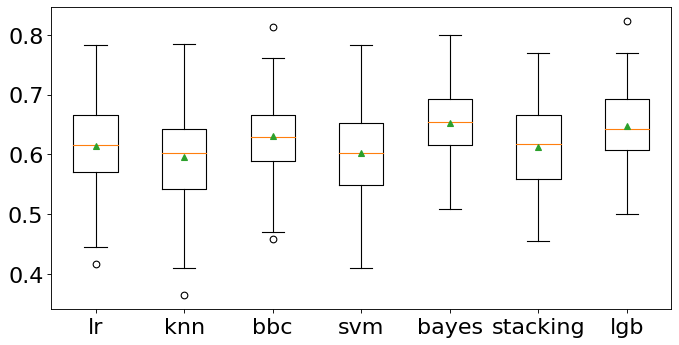

In [58]:
compare_models(X, y)

ADASYN

In [59]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

>lr 0.741 (0.043)
>knn 0.801 (0.031)
>bbc 0.796 (0.035)
>svm 0.807 (0.031)
>bayes 0.709 (0.045)
>stacking 0.827 (0.032)
>lgb 0.792 (0.034)


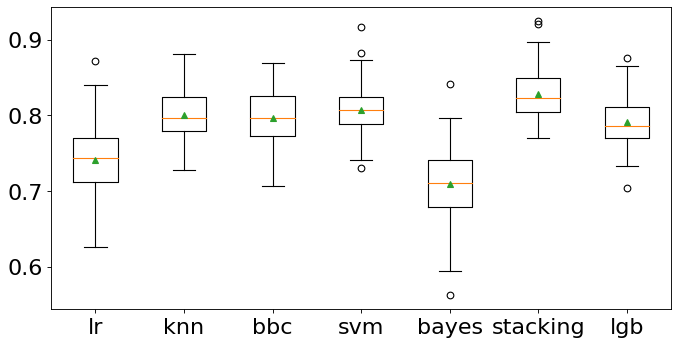

In [60]:
compare_models(X_res, y_res)

>lr 0.741 (0.043)
>knn 0.801 (0.031)
>bbc 0.794 (0.038)
>svm 0.807 (0.031)
>bayes 0.709 (0.045)
>stacking 0.825 (0.035)
>lgb 0.792 (0.034)


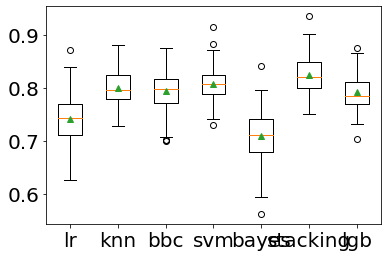

In [61]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_res, y_res)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [62]:
ada = RandomOverSampler(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

>lr 0.755 (0.040)
>knn 0.770 (0.033)
>bbc 0.855 (0.036)
>svm 0.800 (0.032)
>bayes 0.738 (0.041)
>stacking 0.846 (0.030)
>lgb 0.798 (0.033)


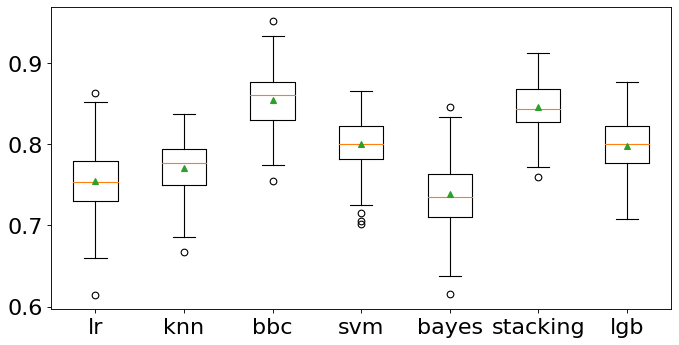

In [63]:
compare_models(X_res, y_res)

In [64]:
ada = RandomUnderSampler(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

>lr 0.754 (0.061)
>knn 0.719 (0.060)
>bbc 0.706 (0.062)
>svm 0.744 (0.059)
>bayes 0.738 (0.061)
>stacking 0.754 (0.063)
>lgb 0.737 (0.068)


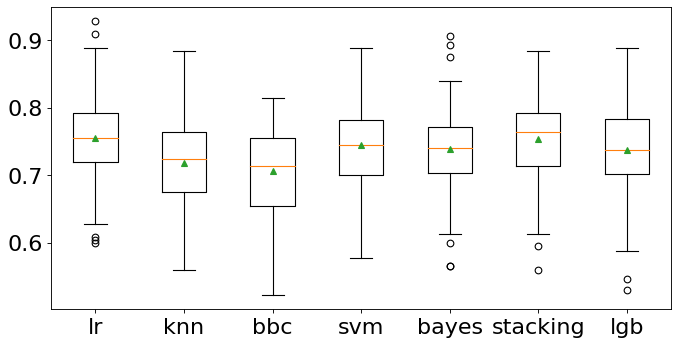

In [65]:
compare_models(X_res, y_res)

In [66]:
ada = SMOTE(random_state=42)
X_res, y_res = ada.fit_resample(X, y)

>lr 0.766 (0.042)
>knn 0.793 (0.031)
>bbc 0.797 (0.042)
>svm 0.806 (0.031)
>bayes 0.737 (0.042)
>stacking 0.812 (0.031)
>lgb 0.789 (0.036)


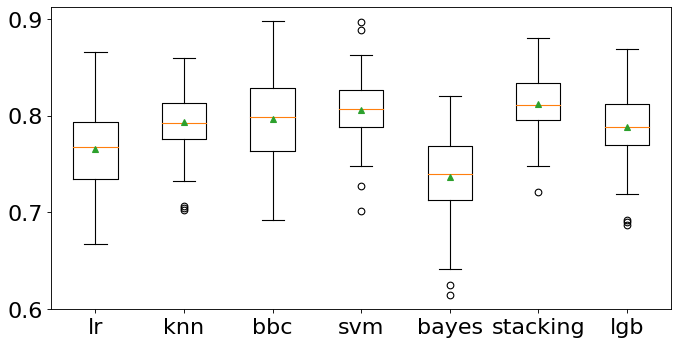

In [67]:
compare_models(X_res, y_res)

In [68]:
lgbm_clf.fit(X_res, y_res)
y_pred = lgbm_clf.predict(te_data.drop('Outcome', axis=1))

In [69]:
print_confusion_matrics(te_data['Outcome'], y_pred)

          0          1
0  0.805195   Accuracy
1  0.676056  Precision
2  0.872727     Recall
3  0.761905    F-score


In [70]:
y_pred = bbc.predict(te_data.drop('Outcome', axis=1))
print_confusion_matrics(te_data['Outcome'], y_pred)

          0          1
0  0.720779   Accuracy
1  0.596774  Precision
2  0.672727     Recall
3  0.632479    F-score


In [71]:
bbc = BalancedBaggingClassifier(random_state=42, oob_score=True)
bbc.fit(X_res, y_res)

BalancedBaggingClassifier(oob_score=True, random_state=42)

In [72]:
y_pred = bbc.predict(te_data.drop('Outcome', axis=1))
print_confusion_matrics(te_data['Outcome'], y_pred)

          0          1
0  0.987013   Accuracy
1  0.981818  Precision
2  0.981818     Recall
3  0.981818    F-score


In [73]:
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(tr_data.drop('Outcome', axis=1), tr_data['Outcome'])

In [74]:
bbc = BalancedBaggingClassifier(random_state=42, oob_score=True)
bbc.fit(X_res, y_res)

BalancedBaggingClassifier(oob_score=True, random_state=42)

In [75]:
y_pred = bbc.predict(te_data.drop('Outcome', axis=1))
print_confusion_matrics(te_data['Outcome'], y_pred)

          0          1
0   0.74026   Accuracy
1       0.6  Precision
2  0.818182     Recall
3  0.692308    F-score


>lr 0.930 (0.035)
>knn 0.955 (0.027)
>bbc 0.940 (0.033)
>svm 0.956 (0.024)
>bayes 0.876 (0.046)
>stacking 0.967 (0.022)
>lgb 0.929 (0.029)


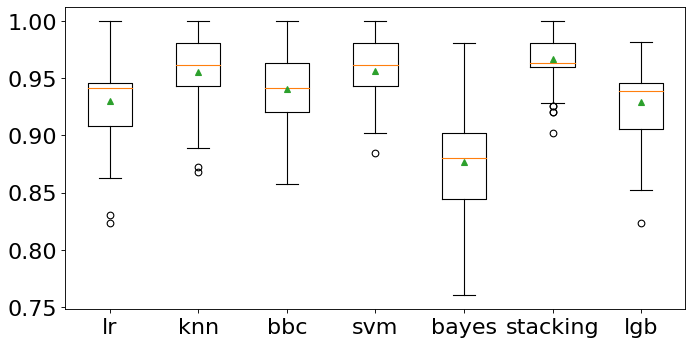

In [76]:
compare_models(X_res, y_res)

In [77]:
# get a stacking ensemble of models
def compare_stacking(X_res, y_res):
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('bbc', BalancedBaggingClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # level0.append(('lama', automl))
    level0.append(('lgbm', lgbm_clf))
    # define meta learner model
    results = list()
    names = list()
    for model in level0:
        level1 = model[1]
        name = model[0]
        model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        scores = evaluate_model(model, X_res, y_res)        
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
        # plot model performance for comparison
    figure(figsize=(10, 5), dpi=80)    
    pyplot.boxplot(results, labels=names, showmeans=True, widths=0.5)
    pyplot.show()
    return model

>lr 0.966 (0.021)
>knn 0.964 (0.023)
>bbc 0.958 (0.030)
>svm 0.964 (0.022)
>bayes 0.955 (0.026)
>lgbm 0.965 (0.022)


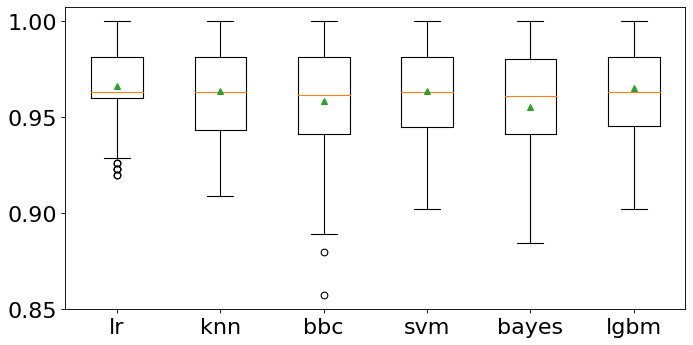

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('bbc', BalancedBaggingClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB()),
                               ('lgbm',
                                LGBMClassifier(colsample_bytree=0.9188117152201242,
                                               learning_rate=0.05, max_depth=7,
                                               min_child_samples=137,
                                               min_child_weight=0.1,
                                               n_estimators=200, num_leaves=19,
                                               reg_alpha=2, reg_lambda=0,
                                               subsample=0.38188584007687904))],
                   final_estimator=LGBMClassifier(colsample_bytree=0.9188117152201242,
                                            

In [78]:
compare_stacking(X_res, y_res)